# Launch Turi Create

In [ ]:
!pip install turicreate

In [3]:
import turicreate

# Load house sales data

In [5]:
sales = turicreate.SFrame(working_dir + '/home_data.sframe/')

In [6]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650.0,1.0,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242.0,2.0,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000.0,1.0,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000.0,1.0,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080.0,1.0,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930.0,1.0,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819.0,2.0,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711.0,1.0,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470.0,1.0,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560.0,2.0,0


# Explore

In [7]:
sales.show()

Materializing SFrame

Warning: Skipping column 'date'. Unable to show columns of type 'datetime'; only [int, float, str] can be shown.

Further warnings of unsupported type will be suppressed.

In [8]:
turicreate.show(sales[1:5000]['sqft_living'],sales[1:5000]['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Simple regression model that predicts price from square feet

In [9]:
training_set, test_set = sales.random_split(.8,seed=0)

## train simple regression model

In [10]:
sqft_model = turicreate.linear_regression.create(training_set,target='price',features=['sqft_living'])

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16514

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Validation Max Error | Training Root-Mean-Square Error | Validation Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

| 1         | 2        | 1.005984     | 4301085.302834     | 4377362.624513       | 261129.212569                   | 295501.662331                     |

+-----------+----------+--------------+--------------------+----------------------+---------------------------------+-----------------------------------+

SUCCESS: Optimal solution found.

# Evaluate the quality of our model

In [12]:
print (test_set['price'].mean())

[310000.0, 650000.0, 233000.0, 580500.0, 535000.0, 605000.0, 775000.0, 292500.0, 289000.0, 571000.0, 349000.0, 360000.0, 243500.0, 247500.0, 470000.0, 480000.0, 770000.0, 519950.0, 527700.0, 420000.0, 890000.0, 282950.0, 255000.0, 420000.0, 807100.0, 284000.0, 917500.0, 425000.0, 260000.0, 297000.0, 274250.0, 840000.0, 677900.0, 280000.0, 279950.0, 479950.0, 264950.0, 1025000.0, 2400000.0, 260000.0, 525000.0, 369900.0, 210000.0, 304900.0, 170000.0, 2050000.0, 780000.0, 330000.0, 360000.0, 550000.0, 208633.0, 315000.0, 1384000.0, 1400000.0, 548000.0, 520000.0, 230000.0, 232000.0, 740000.0, 640000.0, 940000.0, 559900.0, 265000.0, 425000.0, 552250.0, 206600.0, 299000.0, 855000.0, 437500.0, 420000.0, 795000.0, 810000.0, 338000.0, 315000.0, 450000.0, 799000.0, 403950.0, 490000.0, 330000.0, 927000.0, 530000.0, 352000.0, 322500.0, 650000.0, 339000.0, 570000.0, 423000.0, 482000.0, 1300000.0, 988000.0, 1000000.0, 350000.0, 205000.0, 333500.0, 255000.0, 348000.0, 325000.0, 340500.0, 290900.0, 31

In [13]:
print (sqft_model.evaluate(test_set))

{'max_error': 4165467.5922606625, 'rmse': 255149.27179666038}


# Explore model a little further

In [14]:
sqft_model.coefficients

name,index,value,stderr
(intercept),None,-41906.54181,5024.06906137
sqft_living,None,279.215262846,2.21069601254


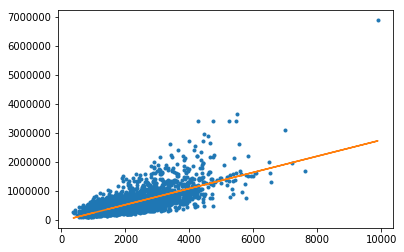

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(test_set['sqft_living'],test_set['price'],'.',
        test_set['sqft_living'],sqft_model.predict(test_set),'-')

# Explore other features of the data

In [16]:
my_features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','zipcode']

In [17]:
sales[my_features].show()

Materializing SFrame

In [18]:
turicreate.show(sales['zipcode'],sales['price'])

Materializing X axis SArray

Materializing Y axis SArray

# Build a model with these additional features

In [47]:
my_features_model = turicreate.linear_regression.create(training_set,target='price',features=my_features, validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 75

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.038874     | 4086543.315841     | 189216.804808                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

# Compare simple model with more complex one

In [20]:
print (my_features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [48]:
print (sqft_model.evaluate(test_set))
print (my_features_model.evaluate(test_set))

{'max_error': 4165467.5922606625, 'rmse': 255149.27179666038}
{'max_error': 3152242.784869095, 'rmse': 180439.07296639626}


# Apply learned models to make predictions

In [22]:
house1 = sales[sales['id']=='5309101200']

In [23]:
house1

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+----------+----------+-----------+
|     id     |            date           |  price   | bedrooms | bathrooms |
+------------+---------------------------+----------+----------+-----------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000.0 |   4.0    |    2.25   |
+------------+---------------------------+----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    2400.0   |  5350.0  |  1.5   |     0      |  0   |     4     |  7.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   1460.0   |     940.0     |  1929.0  |     0.0      |  98117  | 47.67632376 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.37010126 |     1250.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="http://blue.kingcounty.com/Assessor/eRealProperty/MediaHandler.aspx?Media=2916871">

In [24]:
print (house1['price'])

[620000.0, ... ]


In [25]:
print (sqft_model.predict(house1))

[628210.0890209697]


In [26]:
print (my_features_model.predict(house1))

[732047.4608451272]


## Prediction for a second house, a fancier one

In [27]:
house2 = sales[sales['id']=='1925069082']

In [28]:
house2

Columns:
	id	str
	date	datetime
	price	float
	bedrooms	float
	bathrooms	float
	sqft_living	float
	sqft_lot	float
	floors	float
	waterfront	int
	view	int
	condition	int
	grade	float
	sqft_above	float
	sqft_basement	float
	yr_built	float
	yr_renovated	float
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000.0 |   5.0    |    4.25   |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade |
+-------------+----------+--------+------------+------+-----------+-------+
|    4640.0   | 22703.0  |  2.0   |     1      |  4   |     5     |  8.0  |
+-------------+----------+--------+------------+------+-----------+-------+
+------------+---------------+----------+--------------+---------+-------------+
| sqft_above | sqft_basement | yr_built | yr_renovated | zipcode |     lat     |
+------------+---------------+----------+--------------+---------+-------------+
|   2860.0   |     1780.0    |  1952.0  |     0.0      |  98052  | 47.63925783 |
+------------+---------------+----------+--------------+---------+-------------+
+---------------+---------------+-----+
|      long     | sqft_living15 | ... |
+---------------+---------------+-----+
| -122.09722322 |     3140.0    | ... |
+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="https://ssl.cdn-redfin.com/photo/1/bigphoto/302/734302_0.jpg">

In [29]:
print (sqft_model.predict(house2))

[1253652.2777965562]


In [30]:
print (my_features_model.predict(house2))

[1233620.5136967662]


## Prediction for a super fancy home

In [31]:
bill_gates = {'bedrooms':[8], 
              'bathrooms':[25], 
              'sqft_living':[50000], 
              'sqft_lot':[225000],
              'floors':[4], 
              'zipcode':['98039'], 
              'condition':[10], 
              'grade':[10],
              'waterfront':[1],
              'view':[4],
              'sqft_above':[37500],
              'sqft_basement':[12500],
              'yr_built':[1994],
              'yr_renovated':[2010],
              'lat':[47.627606],
              'long':[-122.242054],
              'sqft_living15':[5000],
              'sqft_lot15':[40000]}

<img src="https://upload.wikimedia.org/wikipedia/commons/2/26/Residence_of_Bill_Gates.jpg">

In [32]:
print (my_features_model.predict(turicreate.SFrame(bill_gates)))

[15113096.949181754]


##  We found the zip code with the highest average house price. What is the average house price of that zip code?

In [36]:
h_zip = sales[sales['zipcode'] == '98039']
print (h_zip['price'].mean())

2160606.6


## What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?

In [52]:
f_houses = sales[sales['sqft_living'] > 2000]
f_houses = f_houses[f_houses['sqft_living'] < 4000]
print (len(f_houses['sqft_living']))
print (len(sales['sqft_living']))

9111
21613


## What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [46]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]
advanced_features_model = turicreate.linear_regression.create(training_set,target='price',features=advanced_features, validation_set=None)
print (advanced_features_model.evaluate(test_set))

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 87

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------------------------+

| Iteration | Passes   | Elapsed Time | Training Max Error | Training Root-Mean-Square Error |

+-----------+----------+--------------+--------------------+---------------------------------+

| 1         | 2        | 0.063855     | 4336058.938794     | 162392.982702                   |

+-----------+----------+--------------+--------------------+---------------------------------+

SUCCESS: Optimal solution found.

{'max_error': 3170363.1813837998, 'rmse': 155269.65792732083}
